In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

In [3]:
import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    current_crime_type = None
    encountered_crime_type = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a crime type. 

        if not encountered_crime_type or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            current_crime_type = cell_a_value
            encountered_crime_type = True  
            continue 
        
        # After a crime type, the next rows are age  until the next crime type.

        if cell_a_value and encountered_crime_type:
            age = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                year = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([current_crime_type, age, year, value])
            continue
        
        # Reset the flag if this row is empty and we're between crime types
        if cell_a_value == None:
            encountered_crime_type = False

    df = pd.DataFrame(data, columns=['Type of Crime', 'age', 'Year', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'C:\Users\mahes\Downloads\age (1).xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df['Type_of_Crime'] = df['Type_of_Crime'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['age'] = df['age'].str.strip()
df['Type_of_Crime'] = df['Type_of_Crime'].str.strip()

df = df[df['age'] != 'Total']
df = df[df['Type_of_Crime'] != 'Delitos']
df_age = df

In [4]:

grouped = df_age.groupby(['Type_of_Crime', 'age','Year'])['Value'].sum().reset_index(name='total_crimes')
total_crimes_crime= df_age.groupby(['Type_of_Crime','Year'])['Value'].sum().reset_index(name='crimetype_total')
merged_age= pd.merge(grouped, total_crimes_crime, on=['Type_of_Crime','Year'])
merged_age['percentage'] = (merged_age['total_crimes'] / merged_age['crimetype_total']) * 100



In [5]:
merged_age

,Type_of_Crime,age,Year,total_crimes,crimetype_total,percentage
0,Contra el orden público,From 18 to 20 years of age,2013,1215,12744,9.533898
1,Contra el orden público,From 21 to 25 years,2013,2169,12744,17.019774
2,Contra el orden público,From 26 to 30 years,2013,2180,12744,17.106089
3,Contra el orden público,From 31 to 35 years,2013,2175,12744,17.066855
4,Contra el orden público,From 36 to 40 years,2013,1775,12744,13.928123
...,...,...,...,...,...,...
1165,Torturas e integridad moral,From 36 to 40 years,2022,1538,9842,15.626905
1166,Torturas e integridad moral,From 41 to 50 years of age,2022,2779,9842,28.236131
1167,Torturas e integridad moral,From 51 to 60 years,2022,1221,9842,12.406015
1168,Torturas e integridad moral,From 61 to 70 years,2022,353,9842,3.586669


In [6]:

import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    current_region_type = None
    encountered_region_type = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a crime type. 

        if not encountered_region_type or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            current_region_type = cell_a_value
            encountered_region_type = True  
            continue 
        
        # After a crime type, the next rows are age  until the next crime type.

        if cell_a_value and encountered_region_type:
            age = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                year = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([current_region_type, age, year, value])
            continue
        
        # Reset the flag if this row is empty and we're between crime types
        if cell_a_value == None:
            encountered_region_type = False

    df = pd.DataFrame(data, columns=['Region', 'Type_of_Crime', 'Year', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'C:\Users\mahes\Downloads\crimesbyregion.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df = df[df['Region'] != 'National Total']
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['Type_of_Crime'] = df['Type_of_Crime'].str.strip()
df['Type_of_Crime'] = df['Type_of_Crime'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Type_of_Crime'] = df['Type_of_Crime'].str.strip()

df = df[df['Type_of_Crime'] != 'Total Offenses']

df_region_crime = df


In [7]:
result_age_df = pd.merge(df_region_crime, merged_age, on=['Type_of_Crime', 'Year'], how='left')


In [8]:
result_age_df['final_value'] = ((result_age_df['Value'] * result_age_df['percentage'])/100)


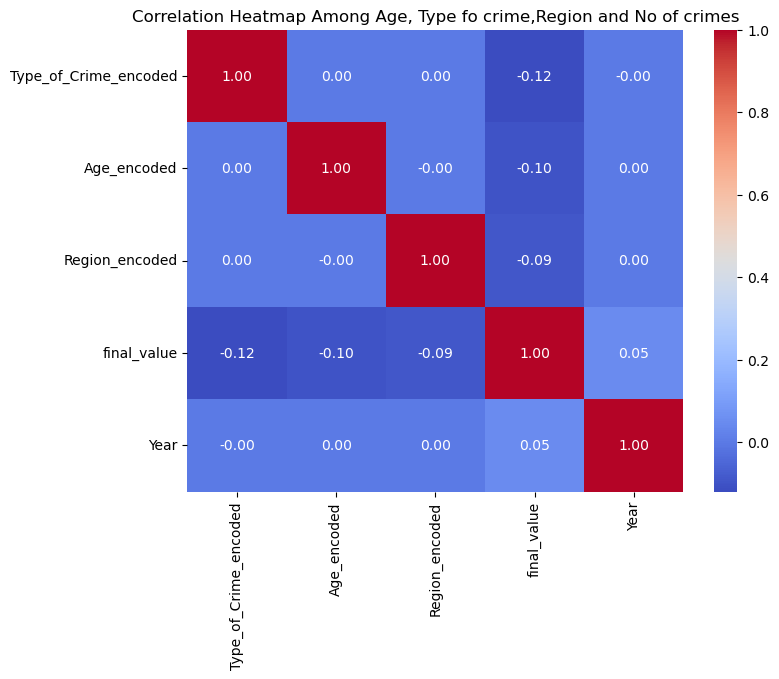

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered_summ = result_age_df
# Encoding 'Type_of_Crime' and 'Age'
df_filtered_summ['Type_of_Crime_encoded'] = df_filtered_summ['Type_of_Crime'].astype('category').cat.codes
df_filtered_summ['Region_encoded'] = df_filtered_summ['Region'].astype('category').cat.codes
df_filtered_summ['Age_encoded'] = df_filtered_summ['age'].astype('category').cat.codes
# Calculate correlations among encoded variables and 'Value'
corr = df_filtered_summ[['Type_of_Crime_encoded', 'Age_encoded','Region_encoded', 'final_value','Year']].corr()

# Plotting heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Among Age, Type fo crime,Region and No of crimes')
plt.show()

In [10]:
#No of crimes and type of crime commited got a slight negative correlation
#No of crimes and region got a slight negative correlation

In [11]:

df_summary = df_filtered_summ.groupby('Year')['final_value'].sum().reset_index()
df_summary['Year'] = pd.to_datetime(df_summary['Year'].astype(str) + '-12-31')
df_summary.set_index('Year', inplace=True)

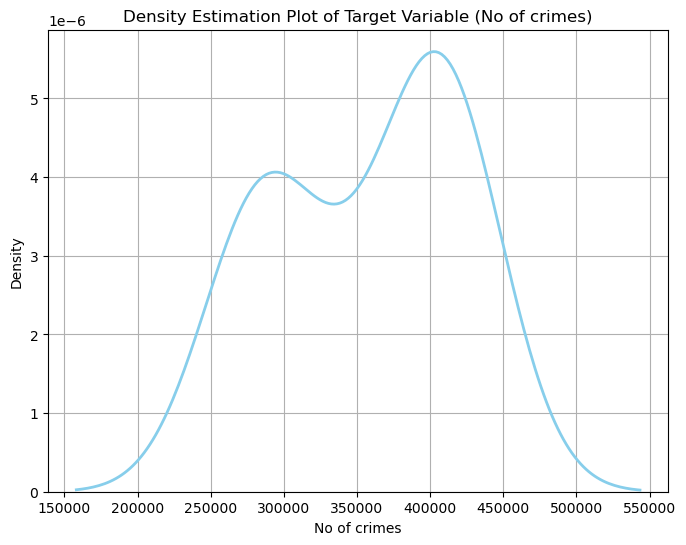

In [12]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df_summary['final_value'], color='skyblue', linewidth=2)
plt.title('Density Estimation Plot of Target Variable (No of crimes)')
plt.xlabel('No of crimes')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [13]:
#analysis is that the no of crimes  is not balanced as there is right skewed

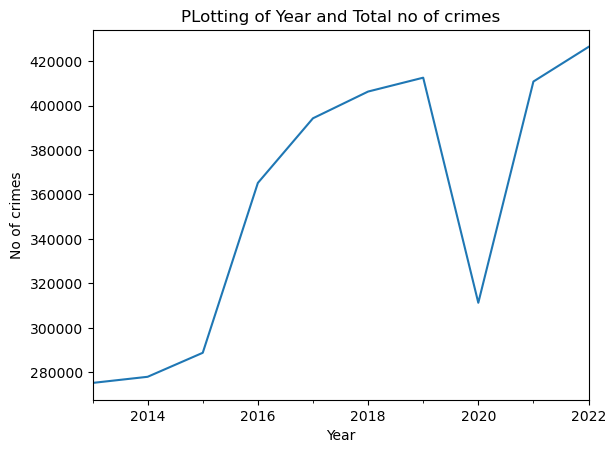

In [14]:
df_summary['final_value'].plot(title='PLotting of Year and Total no of crimes')
plt.ylabel('No of crimes')
plt.show()

In [15]:
#The drop in crimes in 2020 can be due to corona

In [16]:
#Forecast for the total no of crimes

In [17]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

result = adfuller(df_summary['final_value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpret the p-value
if result[1] > 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

ADF Statistic: -1.531571
p-value: 0.517840
Series is not stationary


In [18]:
from pmdarima.arima import auto_arima

model = auto_arima(df_summary['final_value'], start_p=0, start_q=0,
                   test='adf',       
                   max_p=3, max_q=3,
                   m=1,           
                   d=None,          
                   seasonal=False,  
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=209.358, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=210.032, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=208.400, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=207.575, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=209.359, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.144 seconds


In [19]:
#Considering order of 0 ,2, 0 for order 

model = ARIMA(df_summary['final_value'], order=(0,2,0))
model_fit = model.fit()
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            final_value   No. Observations:                   10
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -102.787
Date:                Sun, 17 Mar 2024   AIC                            207.575
Time:                        23:19:07   BIC                            207.654
Sample:                    12-31-2013   HQIC                           207.039
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.591e+09    2.4e+09      2.750      0.006    1.89e+09    1.13e+10
Ljung-Box (L1) (Q):                   4.14   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.04   Pr

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


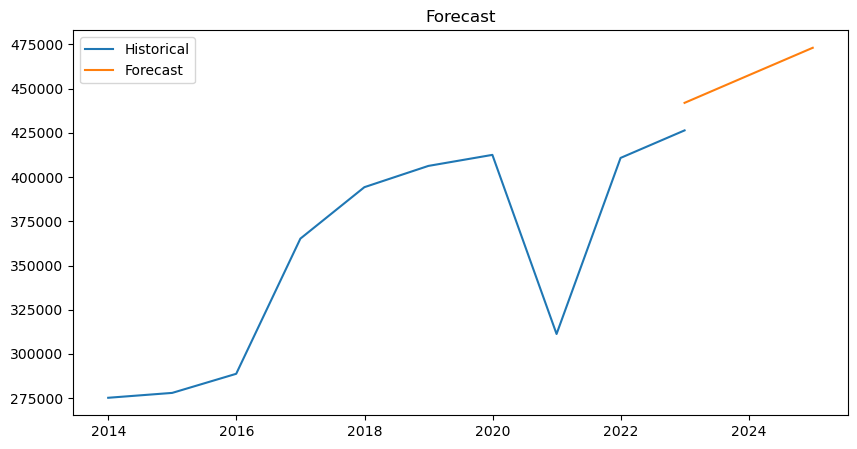

                 Date  Forecast
2023-12-31 2022-12-31  441990.0
2024-12-31 2023-12-31  457564.0
2025-12-31 2024-12-31  473138.0


In [20]:
# Forecast the next 2 years
forecast_dates = pd.date_range(df_summary.index[-1], periods=3, freq='A')
forecast = model_fit.forecast(steps=len(forecast_dates))

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df_summary.index, df_summary['final_value'], label='Historical')
plt.plot(forecast_dates, forecast, label='Forecast')  
plt.title('Forecast')
plt.legend()
plt.show()

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast
})

print(forecast_df)

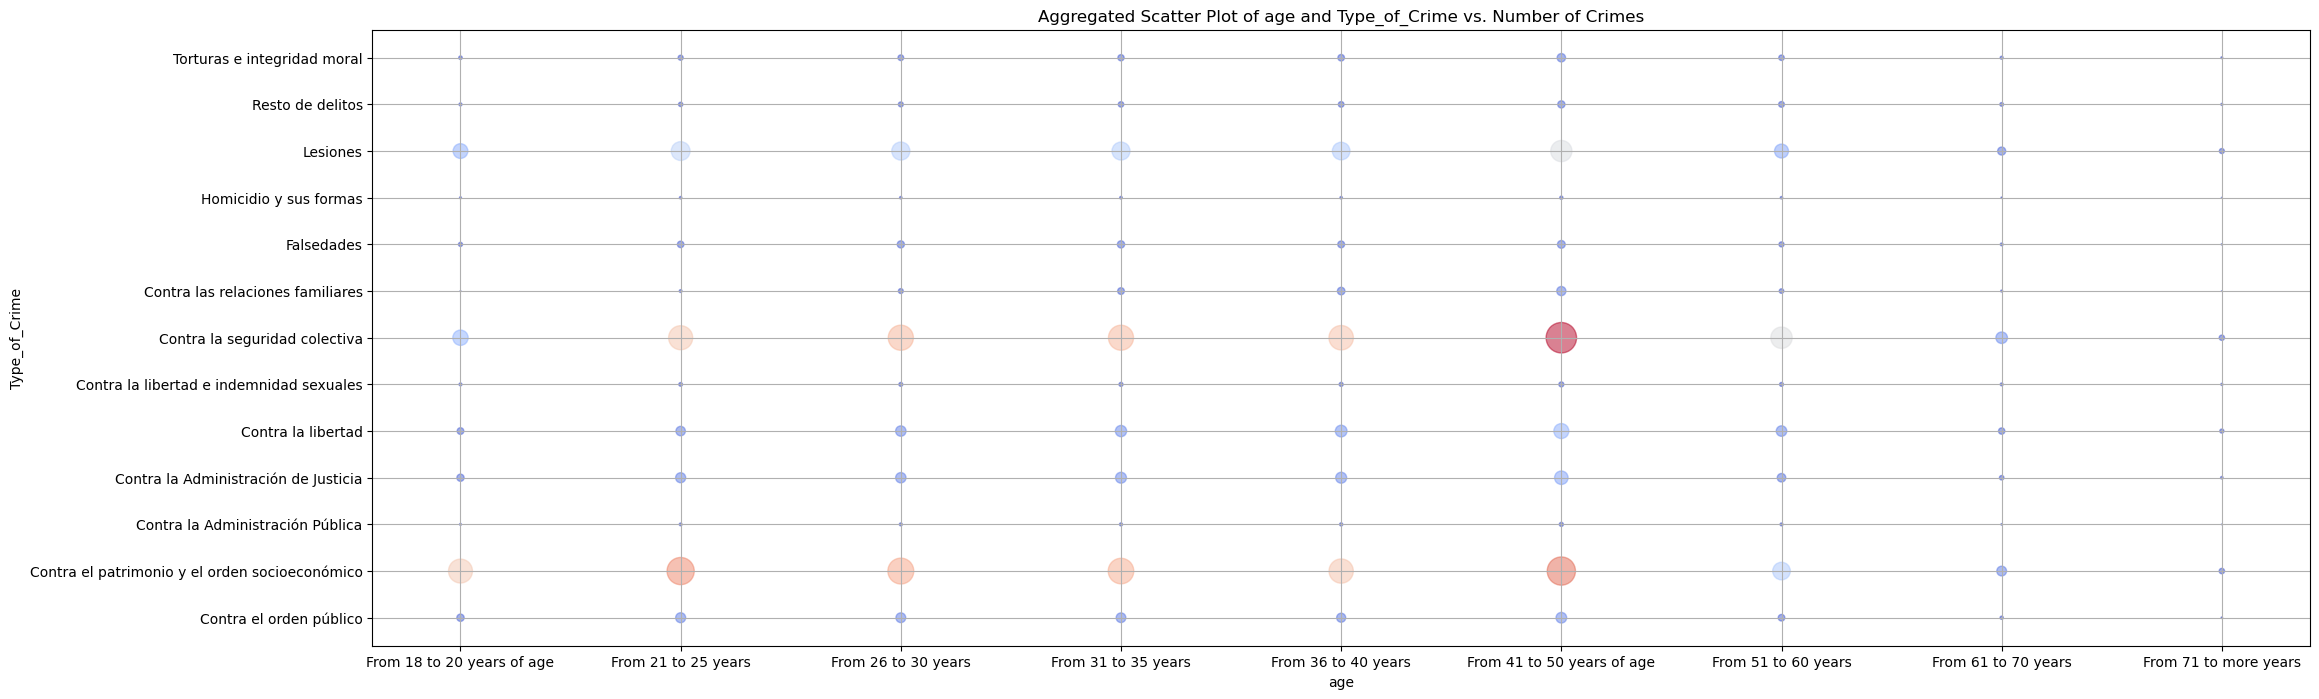

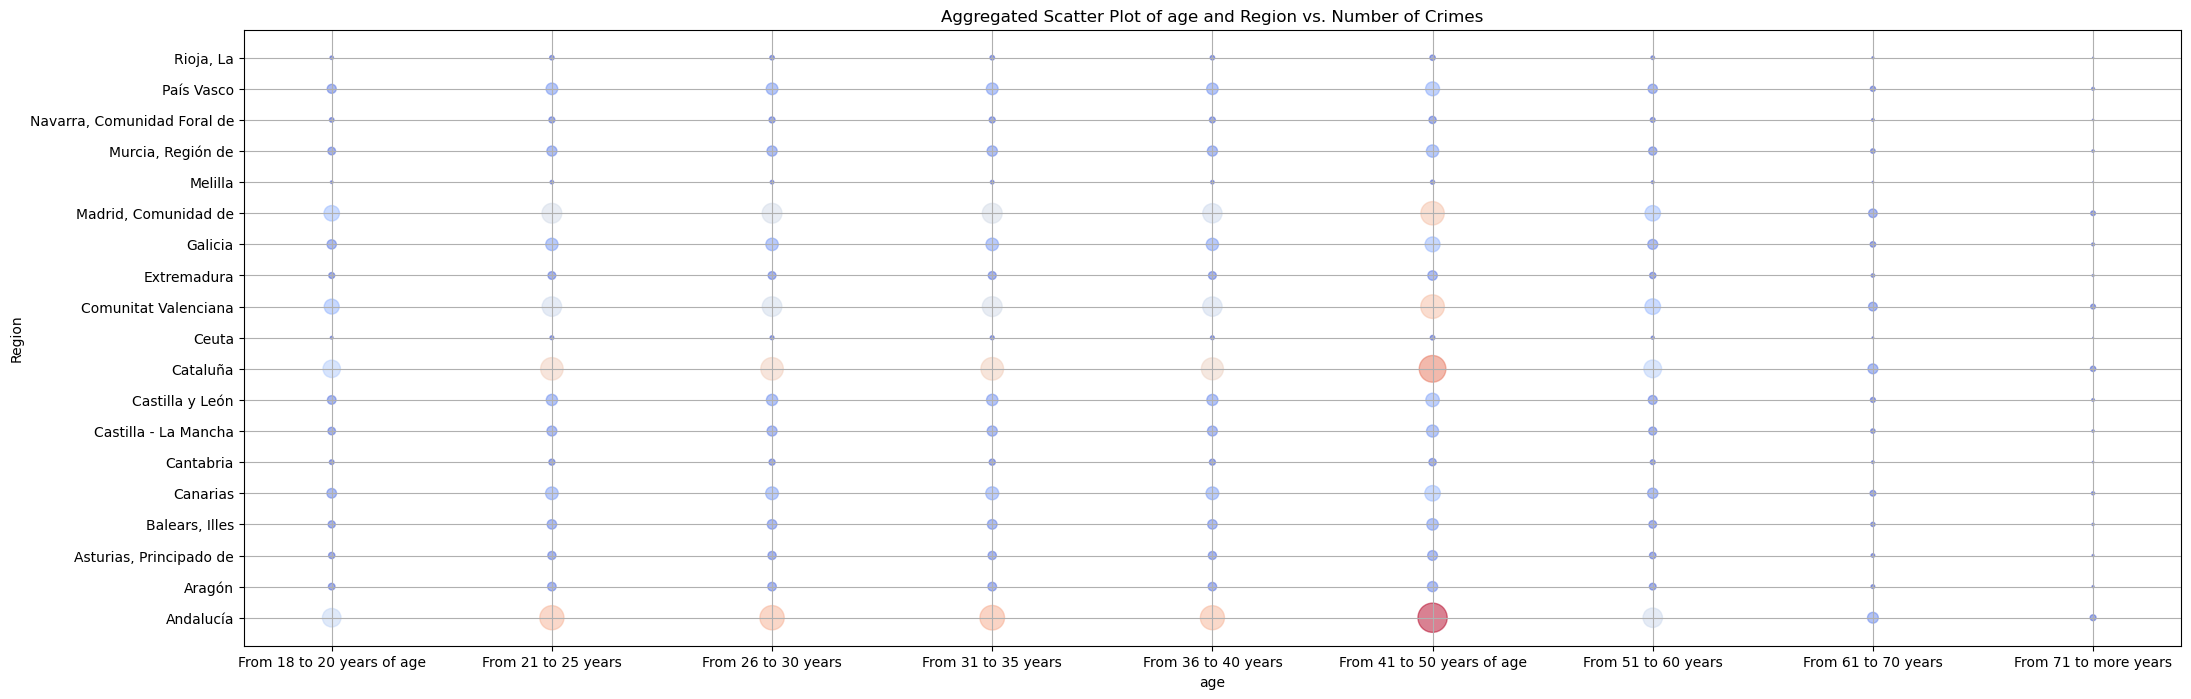

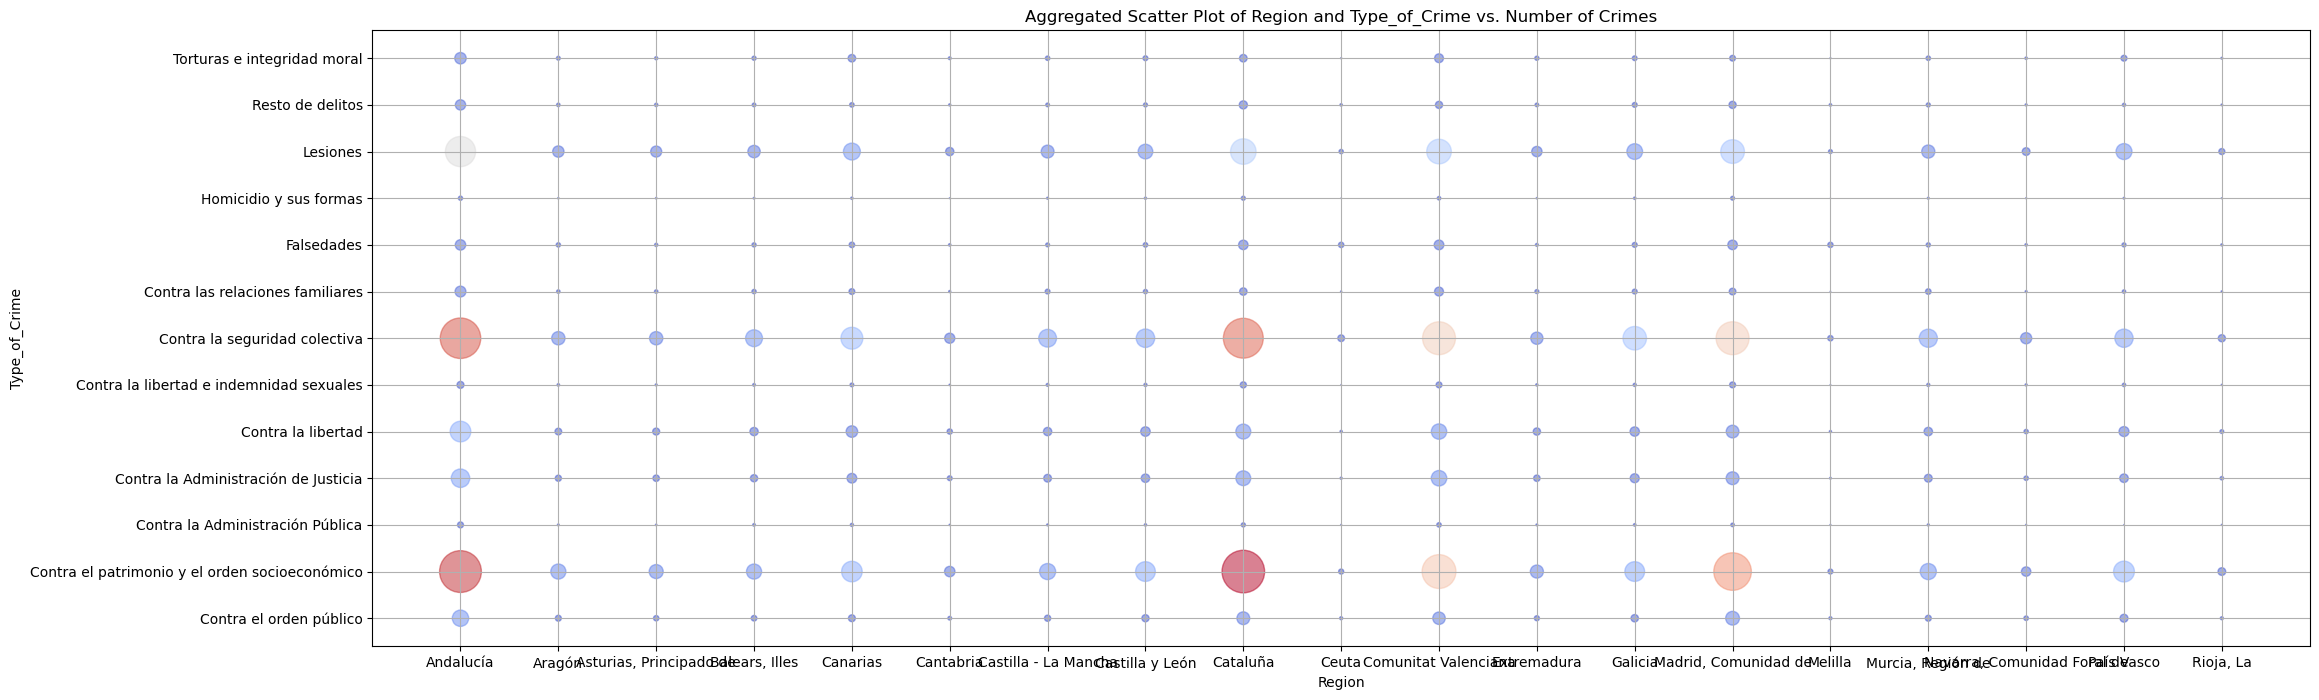

In [21]:
# Aggregate data


agg_df_crimetype = df_filtered_summ.groupby(['age', 'Type_of_Crime']).agg({'final_value': 'mean'}).reset_index()
agg_df_region = df_filtered_summ.groupby(['age', 'Region']).agg({'final_value': 'mean'}).reset_index()
agg_df_cross = df_filtered_summ.groupby(['Type_of_Crime', 'Region']).agg({'final_value': 'mean'}).reset_index()
def plot_crime_data(df, group_by,dime):

    # Aggregate data
    agg_df = df.groupby([dime, group_by]).agg({'final_value': 'mean'}).reset_index()
    
    # Plot
    plt.figure(figsize=(25, 8))
    plt.scatter(agg_df[dime], agg_df[group_by], s=agg_df['final_value'] * 0.4, alpha=0.5, c=agg_df['final_value'], cmap='coolwarm')
    plt.title(f'Aggregated Scatter Plot of {dime} and {group_by} vs. Number of Crimes')
    plt.xlabel(f'{dime}')
    plt.ylabel(group_by)
    plt.grid(True)
    plt.show()


plot_crime_data(agg_df_crimetype, 'Type_of_Crime','age')
plot_crime_data(agg_df_region, 'Region','age')
plot_crime_data(agg_df_cross, 'Type_of_Crime','Region')


In [22]:
#Prediction of no of crimes considering age and type of crime as regressor

In [23]:
#First using Prophet

In [24]:
#!pip install prophet

In [25]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib  # for saving the encoder model

# Initialize the encoders
type_of_crime_encoder = LabelEncoder()
age_encoder = LabelEncoder()
region_encoder = LabelEncoder()
df_filtered_summ = df_filtered_summ.drop(['Type_of_Crime_encoded','Region_encoded','Age_encoded'], axis=1, errors='ignore')
# Assuming your DataFrame 'df' has 'type_of_crime' and 'age' columns
df_filtered_summ['type_of_crime_encoded'] = type_of_crime_encoder.fit_transform(df_filtered_summ['Type_of_Crime'])
df_filtered_summ['age_encoded'] = age_encoder.fit_transform(df_filtered_summ['age'])
df_filtered_summ['region_encoded'] = region_encoder.fit_transform(df_filtered_summ['Region'])

In [26]:
# Save the encoders for future use
joblib.dump(type_of_crime_encoder, 'type_of_crime_encoder.joblib')
joblib.dump(age_encoder, 'age_encoder.joblib')
joblib.dump(region_encoder, 'region_encoder.joblib')

['region_encoder.joblib']

In [27]:
from prophet  import Prophet
import pandas as pd

# Prepare your DataFrame for Prophet
df_filtered_summ['ds'] = pd.to_datetime(df_filtered_summ['Year'].astype(str) + '-12-31')
df_filtered_summ['y'] = df_filtered_summ['final_value']


In [28]:
    # Initialize and fit the Prophet model with additional regressors
model = Prophet(yearly_seasonality=False,changepoint_prior_scale=0.10)
model.add_regressor('age_encoded',  prior_scale=100)
model.add_regressor('type_of_crime_encoded', prior_scale=100)
model.add_regressor('region_encoded', prior_scale=100)
model.fit(df_filtered_summ[['ds','region_encoded','type_of_crime_encoded','age_encoded','y']], algorithm='LBFGS', iter=20000)

23:19:14 - cmdstanpy - INFO - Chain [1] start processing
23:19:16 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
#prediction paarmeters input
age_category = "From 31 to 35 years"
type_of_crime = "Homicidio y sus formas"
region_input = "Canarias"
prediction_year = 2025

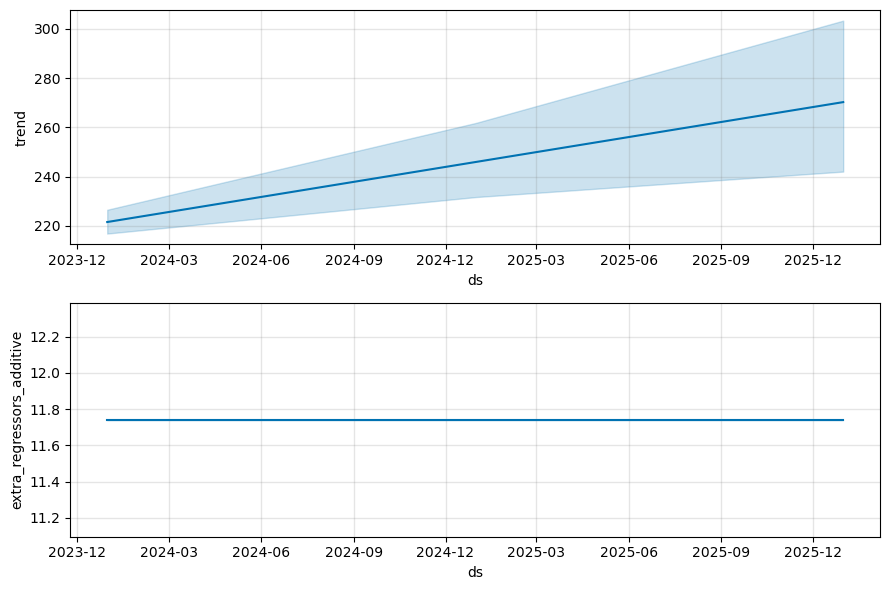

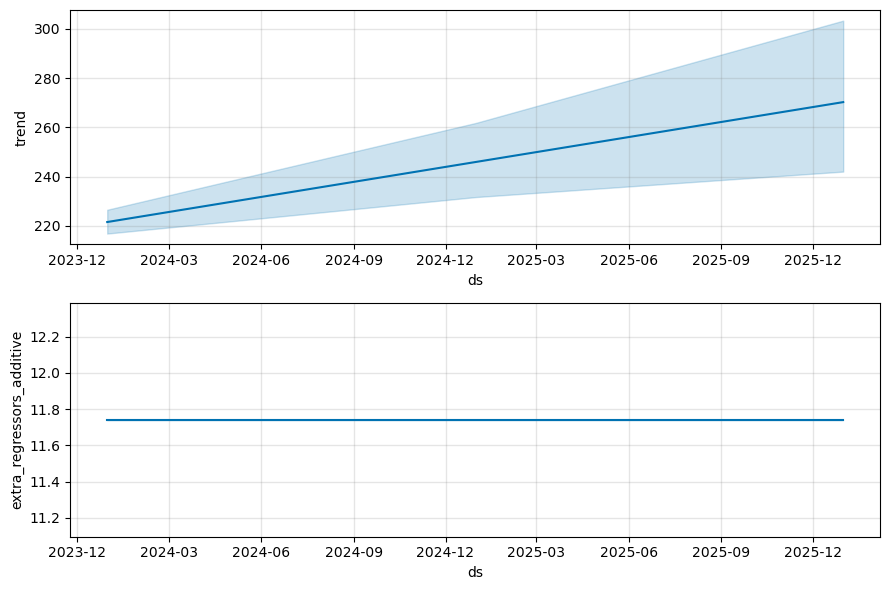

In [30]:
import matplotlib.pyplot as plt

# Load encoders
loaded_type_of_crime_encoder = joblib.load('type_of_crime_encoder.joblib')
loaded_age_encoder = joblib.load('age_encoder.joblib')
loaded_region_encoder = joblib.load('region_encoder.joblib')
# Encode input parameters
input_age_encoded = loaded_age_encoder.transform([age_category])[0]
input_type_of_crime_encoded = loaded_type_of_crime_encoder.transform([type_of_crime])[0]
input_region_encoded = loaded_region_encoder.transform([region_input])[0]
# Prepare future DataFrame for Prophet
last_known_year = df_filtered_summ['ds'].dt.year.max()
future_years = list(range(last_known_year + 1, prediction_year + 1))
future_dates = pd.to_datetime([f"{year}-12-31" for year in future_years])
future_df = pd.DataFrame({'ds': future_dates})

future_df['region_encoded'] = input_region_encoded
future_df['type_of_crime_encoded'] = input_type_of_crime_encoded
future_df['age_encoded'] = input_age_encoded



forecast = model.predict(future_df[['ds','region_encoded','type_of_crime_encoded','age_encoded']])
model.plot_components(forecast)


In [31]:
from prophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2013-12-31', '2021-12-31'])
df_cv = cross_validation(model,horizon = '365 days',initial = '2920 days', period = '365 days')
df_cv.head() 

  0%|          | 0/1 [00:00<?, ?it/s]

23:19:19 - cmdstanpy - INFO - Chain [1] start processing
23:19:20 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-12-31,283.039573,-232.902610,821.528861,4.477688,2021-12-31
1,2022-12-31,277.554176,-240.890636,830.005239,14.086671,2021-12-31
2,2022-12-31,294.445104,-261.407071,830.956226,39.195587,2021-12-31
3,2022-12-31,311.336033,-232.889727,866.513565,31.978435,2021-12-31
4,2022-12-31,328.226961,-219.056107,828.703818,16.370612,2021-12-31


In [32]:
#METRICS ACCORDING TO THE HORIZON
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,249512.209349,499.511971,269.927348,134.788045,5.634171,1.353972,0.939271


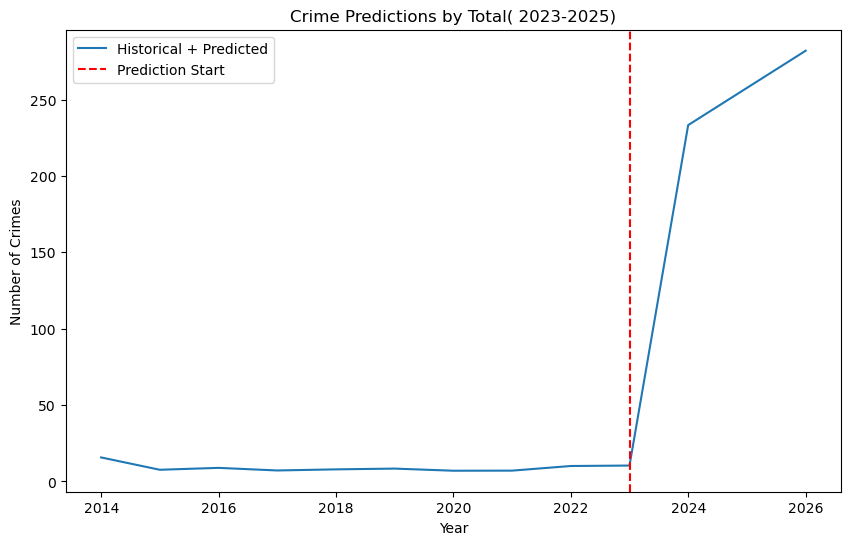

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Combine historical and forecast data for plotting
historical_data =  df_filtered_summ[(df_filtered_summ['age_encoded'] == input_age_encoded) & (df_filtered_summ['type_of_crime_encoded'] == input_type_of_crime_encoded) & (df_filtered_summ['region_encoded'] == input_region_encoded)]
forecast_data = forecast[['ds', 'yhat']].rename(columns={'yhat': 'y'})
combined_data = pd.concat([historical_data, forecast_data])
combined_data = combined_data.sort_values(by='ds')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(combined_data['ds'], combined_data['y'], label='Historical + Predicted')
plt.axvline(x=pd.to_datetime('2023'), color='r', linestyle='--', label='Prediction Start')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Predictions by Total( 2023-2025)')
plt.legend()
plt.show()

In [34]:
#Model is not ideal for varibales with additional regressor 



In [35]:
#!pip install lightgbm

In [36]:
df_filtered_summ = df_filtered_summ.sort_values(by=['age_encoded', 'region_encoded','type_of_crime_encoded', 'ds'])
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby(['age_encoded', 'region_encoded','type_of_crime_encoded'])['y'].shift(1)
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby(['age_encoded', 'region_encoded','type_of_crime_encoded'])['y'].shift(2)
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby(['age_encoded', 'region_encoded','type_of_crime_encoded'])['y'].shift(3)
# Fill missing values in lagged columns with the first available 'y' value in each group
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby(['age_encoded','region_encoded', 'type_of_crime_encoded'])['y_lag1'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby(['age_encoded','region_encoded', 'type_of_crime_encoded'])['y_lag2'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby(['age_encoded', 'region_encoded','type_of_crime_encoded'])['y_lag3'].transform(lambda x: x.fillna(method='bfill'))

df_filtered_summ['y'] = df_filtered_summ['y'].astype(float)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

cutoff_date = df_filtered_summ['ds'].max() - pd.DateOffset(years=2)

# Split your dataset based on the cutoff date
train_df = df_filtered_summ[df_filtered_summ['ds'] <= cutoff_date][['age_encoded', 'region_encoded','type_of_crime_encoded', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
test_df = df_filtered_summ[df_filtered_summ['ds'] > cutoff_date][['age_encoded', 'region_encoded','type_of_crime_encoded', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
# Split the data into training and testing sets
X_train = train_df.drop(['ds', 'y'], axis=1)
y_train = train_df['y']
X_test = test_df.drop(['ds', 'y'], axis=1)
y_test = test_df['y']

In [38]:
# Initialize and train the LightGBM model
model = LGBMRegressor(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=1000
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l2')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 17784, number of used features: 6
[LightGBM] [Info] Start training from score 153.597616


LGBMRegressor(learning_rate=0.05, n_estimators=1000)

In [39]:
import numpy as np
# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse}')

Test RMSE: 122.17963693255888


In [40]:
unique_age_categories = df_filtered_summ['age'].unique() 
unique_types_of_crime = df_filtered_summ['Type_of_Crime'].unique() 
unique_regions = df_filtered_summ['Region'].unique()  
prediction_year = 2025
#dummy intialization for prediction storage frame
final_pred_df_lgbm = df_filtered_summ[df_filtered_summ['age_encoded'] == '111111111']
# Iterate over each unique combination
for age_category in unique_age_categories:
    for type_of_crime in unique_types_of_crime:
        for region_input in unique_regions:
            # Encode input parameters for the current combination
            input_age_encoded = loaded_age_encoder.transform([age_category])[0]
            input_type_of_crime_encoded = loaded_type_of_crime_encoder.transform([type_of_crime])[0]
            input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filter df_filtered_summ for the current combination
            specific_filter = (df_filtered_summ['age_encoded'] == input_age_encoded) & \
                              (df_filtered_summ['type_of_crime_encoded'] == input_type_of_crime_encoded) & \
                              (df_filtered_summ['region_encoded'] == input_region_encoded)
            filtered_for_specific = df_filtered_summ[specific_filter]

            if not filtered_for_specific.empty:
                filtered_for_specific = filtered_for_specific.sort_values('ds')
                last_date = filtered_for_specific['ds'].max()
                last_year = last_date.year

                for year in range(last_year + 1, prediction_year + 1):
                    # Assuming your model needs at least 1 record to make a prediction
                    if len(filtered_for_specific) >= 1:
                        # Prepare input data for prediction using the last available records
                        most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                        most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                        most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                        predict_df = pd.DataFrame({
                            'age_encoded': [input_age_encoded],
                            'region_encoded': [input_region_encoded],
                            'type_of_crime_encoded': [input_type_of_crime_encoded],
                            'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                        # Make the prediction
                        predicted_y = model.predict(predict_df)[0]
                        # Create a new entry for the prediction
                        new_date = pd.Timestamp(year, 12, 31)
                        new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'age_encoded': input_age_encoded,
                            'region_encoded': input_region_encoded,
                            'type_of_crime_encoded': input_type_of_crime_encoded,
                            'age': age_category,
                            'Type_of_Crime': type_of_crime,
                            'Region': region_input,
                        }

                        # Append the new entry to filtered_for_specific for continuity
                        new_entry_df = pd.DataFrame([new_entry])
                        filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
                final_pred_df_lgbm = pd.concat([final_pred_df_lgbm, filtered_for_specific], ignore_index=True)[['ds','Region','Type_of_Crime','age','y','Value']]
            else:
                print(f"No historical data found for age: {age_category}, Type of Crime: {type_of_crime}, Region: {region_input}.")

    

In [41]:
file_path = r'C:\Users\mahes\Downloads\Complete_prediction for LGBM reg with constructed lags(region,age,crime type).xlsx'
final_pred_df_lgbm.to_excel(file_path, index=False, engine='openpyxl')
final_pred_df_lgbm

,ds,Region,Type_of_Crime,age,y,Value
0,2013-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,292.976695,3073.0
1,2014-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,256.235939,2914.0
2,2015-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,251.498581,2864.0
3,2016-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,255.133806,2964.0
4,2017-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,267.903274,3071.0
...,...,...,...,...,...,...
28894,2021-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,0.742784,55.0
28895,2022-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,1.164093,67.0
28896,2023-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,1.114215,NaN
28897,2024-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,1.163484,NaN


In [42]:
# Dictionary to store the maximum forecasted crime value for each combination
max_forecasts = {}

# Loop through each combination to fill the dictionary
for age in unique_age_categories:
    for region in unique_regions:
        for type_of_crime in unique_types_of_crime:
            df_current = final_pred_df_lgbm[
                (final_pred_df_lgbm['age'] == age) & 
                (final_pred_df_lgbm['Region'] == region) & 
                (final_pred_df_lgbm['Type_of_Crime'] == type_of_crime)]

            forecasted_data = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]
            if not forecasted_data.empty:
                max_forecast = forecasted_data['y'].max()
                max_forecasts[(age, region, type_of_crime)] = max_forecast

# Sort the dictionary by value and get the top 10 combinations
top_10_combinations = sorted(max_forecasts, key=max_forecasts.get, reverse=True)[:10]

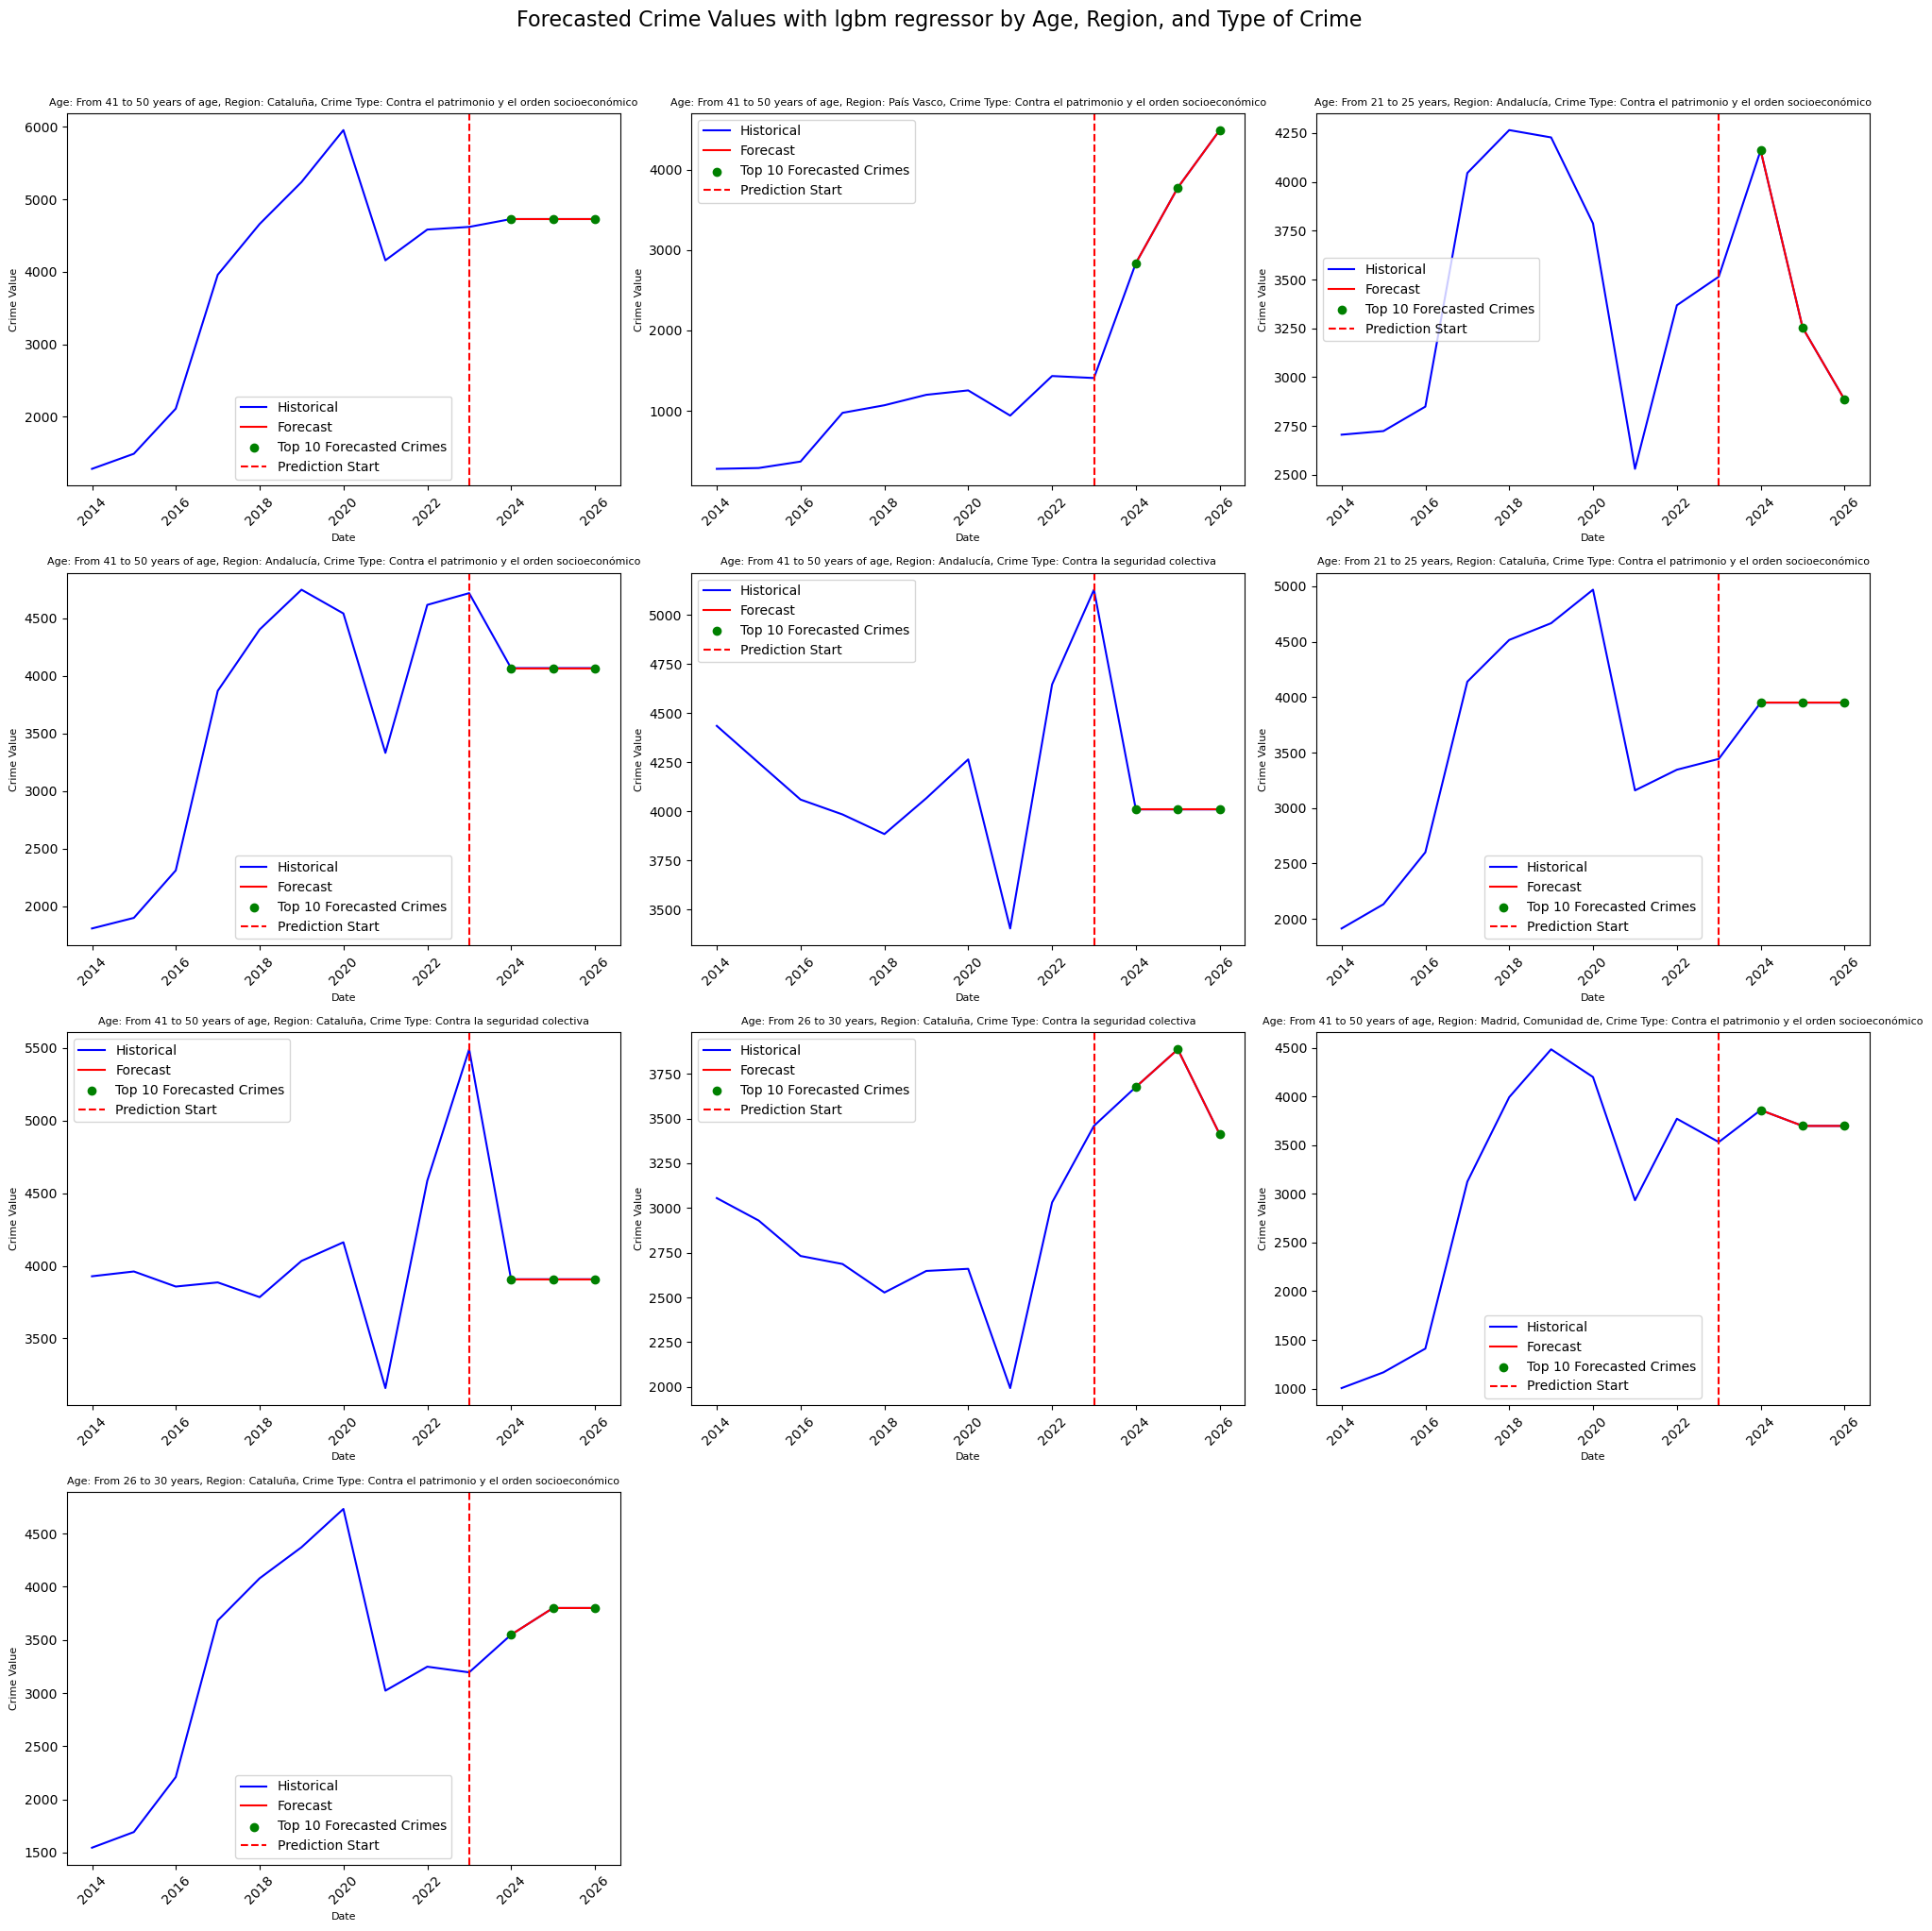

In [43]:
# Calculate grid dimensions
num_combinations = len(top_10_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Forecasted Crime Values with lgbm regressor by Age, Region, and Type of Crime', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_10_combinations):
    age, region, type_of_crime = combination
    df_current = final_pred_df_lgbm[
        (final_pred_df_lgbm['age'] == age) & 
        (final_pred_df_lgbm['Region'] == region) & 
        (final_pred_df_lgbm['Type_of_Crime'] == type_of_crime)]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current
    forecasted_data = df_current[df_current['ds'] > latest_date]
    

    axs[i].plot(historical_data['ds'], historical_data['y'], label='Historical', color='blue')
    axs[i].plot(forecasted_data['ds'], forecasted_data['y'], label='Forecast', color='red')

    # Highlight top 10 forecasted values in this segment
    top_forecasted = forecasted_data.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Top 10 Forecasted Crimes')

    axs[i].set_title(f"Age: {age}, Region: {region}, Crime Type: {type_of_crime}", fontsize=8)
    axs[i].set_xlabel('Date', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Prediction Start')
    axs[i].set_ylabel('Crime Value', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Turn off axes for any remaining subplots
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [44]:
#Preidction using linear regerssion model considering three lags

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("Linear Regression Root Mean Squared Error:", rmse_linear)

Linear Regression Root Mean Squared Error: 163.1685757515181


In [46]:
unique_age_categories = df_filtered_summ['age'].unique() 
unique_types_of_crime = df_filtered_summ['Type_of_Crime'].unique() 
unique_regions = df_filtered_summ['Region'].unique()  
prediction_year = 2025
#dummy intialization for prediction storage frame
final_pred_df_linreg = df_filtered_summ[df_filtered_summ['age_encoded'] == '111111111']
# Iterate over each unique combination
for age_category in unique_age_categories:
    for type_of_crime in unique_types_of_crime:
        for region_input in unique_regions:
            # Encode input parameters for the current combination
            input_age_encoded = loaded_age_encoder.transform([age_category])[0]
            input_type_of_crime_encoded = loaded_type_of_crime_encoder.transform([type_of_crime])[0]
            input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filter df_filtered_summ for the current combination
            specific_filter = (df_filtered_summ['age_encoded'] == input_age_encoded) & \
                              (df_filtered_summ['type_of_crime_encoded'] == input_type_of_crime_encoded) & \
                              (df_filtered_summ['region_encoded'] == input_region_encoded)
            filtered_for_specific = df_filtered_summ[specific_filter]

            if not filtered_for_specific.empty:
                filtered_for_specific = filtered_for_specific.sort_values('ds')
                last_date = filtered_for_specific['ds'].max()
                last_year = last_date.year

                for year in range(last_year + 1, prediction_year + 1):
                    # Assuming your model needs at least 1 record to make a prediction
                    if len(filtered_for_specific) >= 1:
                        # Prepare input data for prediction using the last available records
                        most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                        most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                        most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                        predict_df = pd.DataFrame({
                            'age_encoded': [input_age_encoded],
                            'region_encoded': [input_region_encoded],
                            'type_of_crime_encoded': [input_type_of_crime_encoded],
                            'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                        # Make the prediction
                        predicted_y = model.predict(predict_df)[0]
                        # Create a new entry for the prediction
                        new_date = pd.Timestamp(year, 12, 31)
                        new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'age_encoded': input_age_encoded,
                            'region_encoded': input_region_encoded,
                            'type_of_crime_encoded': input_type_of_crime_encoded,
                            'age': age_category,
                            'Type_of_Crime': type_of_crime,
                            'Region': region_input,
                        }

                        # Append the new entry to filtered_for_specific for continuity
                        new_entry_df = pd.DataFrame([new_entry])
                        filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
                final_pred_df_linreg = pd.concat([final_pred_df_linreg, filtered_for_specific], ignore_index=True)[['ds','Region','Type_of_Crime','age','y','Value']]
            else:
                print(f"No historical data found for age: {age_category}, Type of Crime: {type_of_crime}, Region: {region_input}.")

    

In [47]:
file_path = r'C:\Users\mahes\Downloads\Complete_prediction for linear reg  with constructed lags(region,age,crime type).xlsx'
final_pred_df_linreg.to_excel(file_path, index=False, engine='openpyxl')
final_pred_df_linreg

,ds,Region,Type_of_Crime,age,y,Value
0,2013-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,292.976695,3073.0
1,2014-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,256.235939,2914.0
2,2015-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,251.498581,2864.0
3,2016-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,255.133806,2964.0
4,2017-12-31,Andalucía,Contra el orden público,From 18 to 20 years of age,267.903274,3071.0
...,...,...,...,...,...,...
28894,2021-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,0.742784,55.0
28895,2022-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,1.164093,67.0
28896,2023-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,1.114215,NaN
28897,2024-12-31,"Rioja, La",Torturas e integridad moral,From 71 to more years,1.163484,NaN


In [48]:
# Dictionary to store the maximum forecasted crime value for each combination
max_forecasts = {}

# Loop through each combination to fill the dictionary
for age in unique_age_categories:
    for region in unique_regions:
        for type_of_crime in unique_types_of_crime:
            df_current = final_pred_df_linreg[
                (final_pred_df_linreg['age'] == age) & 
                (final_pred_df_linreg['Region'] == region) & 
                (final_pred_df_linreg['Type_of_Crime'] == type_of_crime)]

            forecasted_data = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]
            if not forecasted_data.empty:
                max_forecast = forecasted_data['y'].max()
                max_forecasts[(age, region, type_of_crime)] = max_forecast

# Sort the dictionary by value and get the top 10 combinations
top_10_combinations = sorted(max_forecasts, key=max_forecasts.get, reverse=True)[:10]

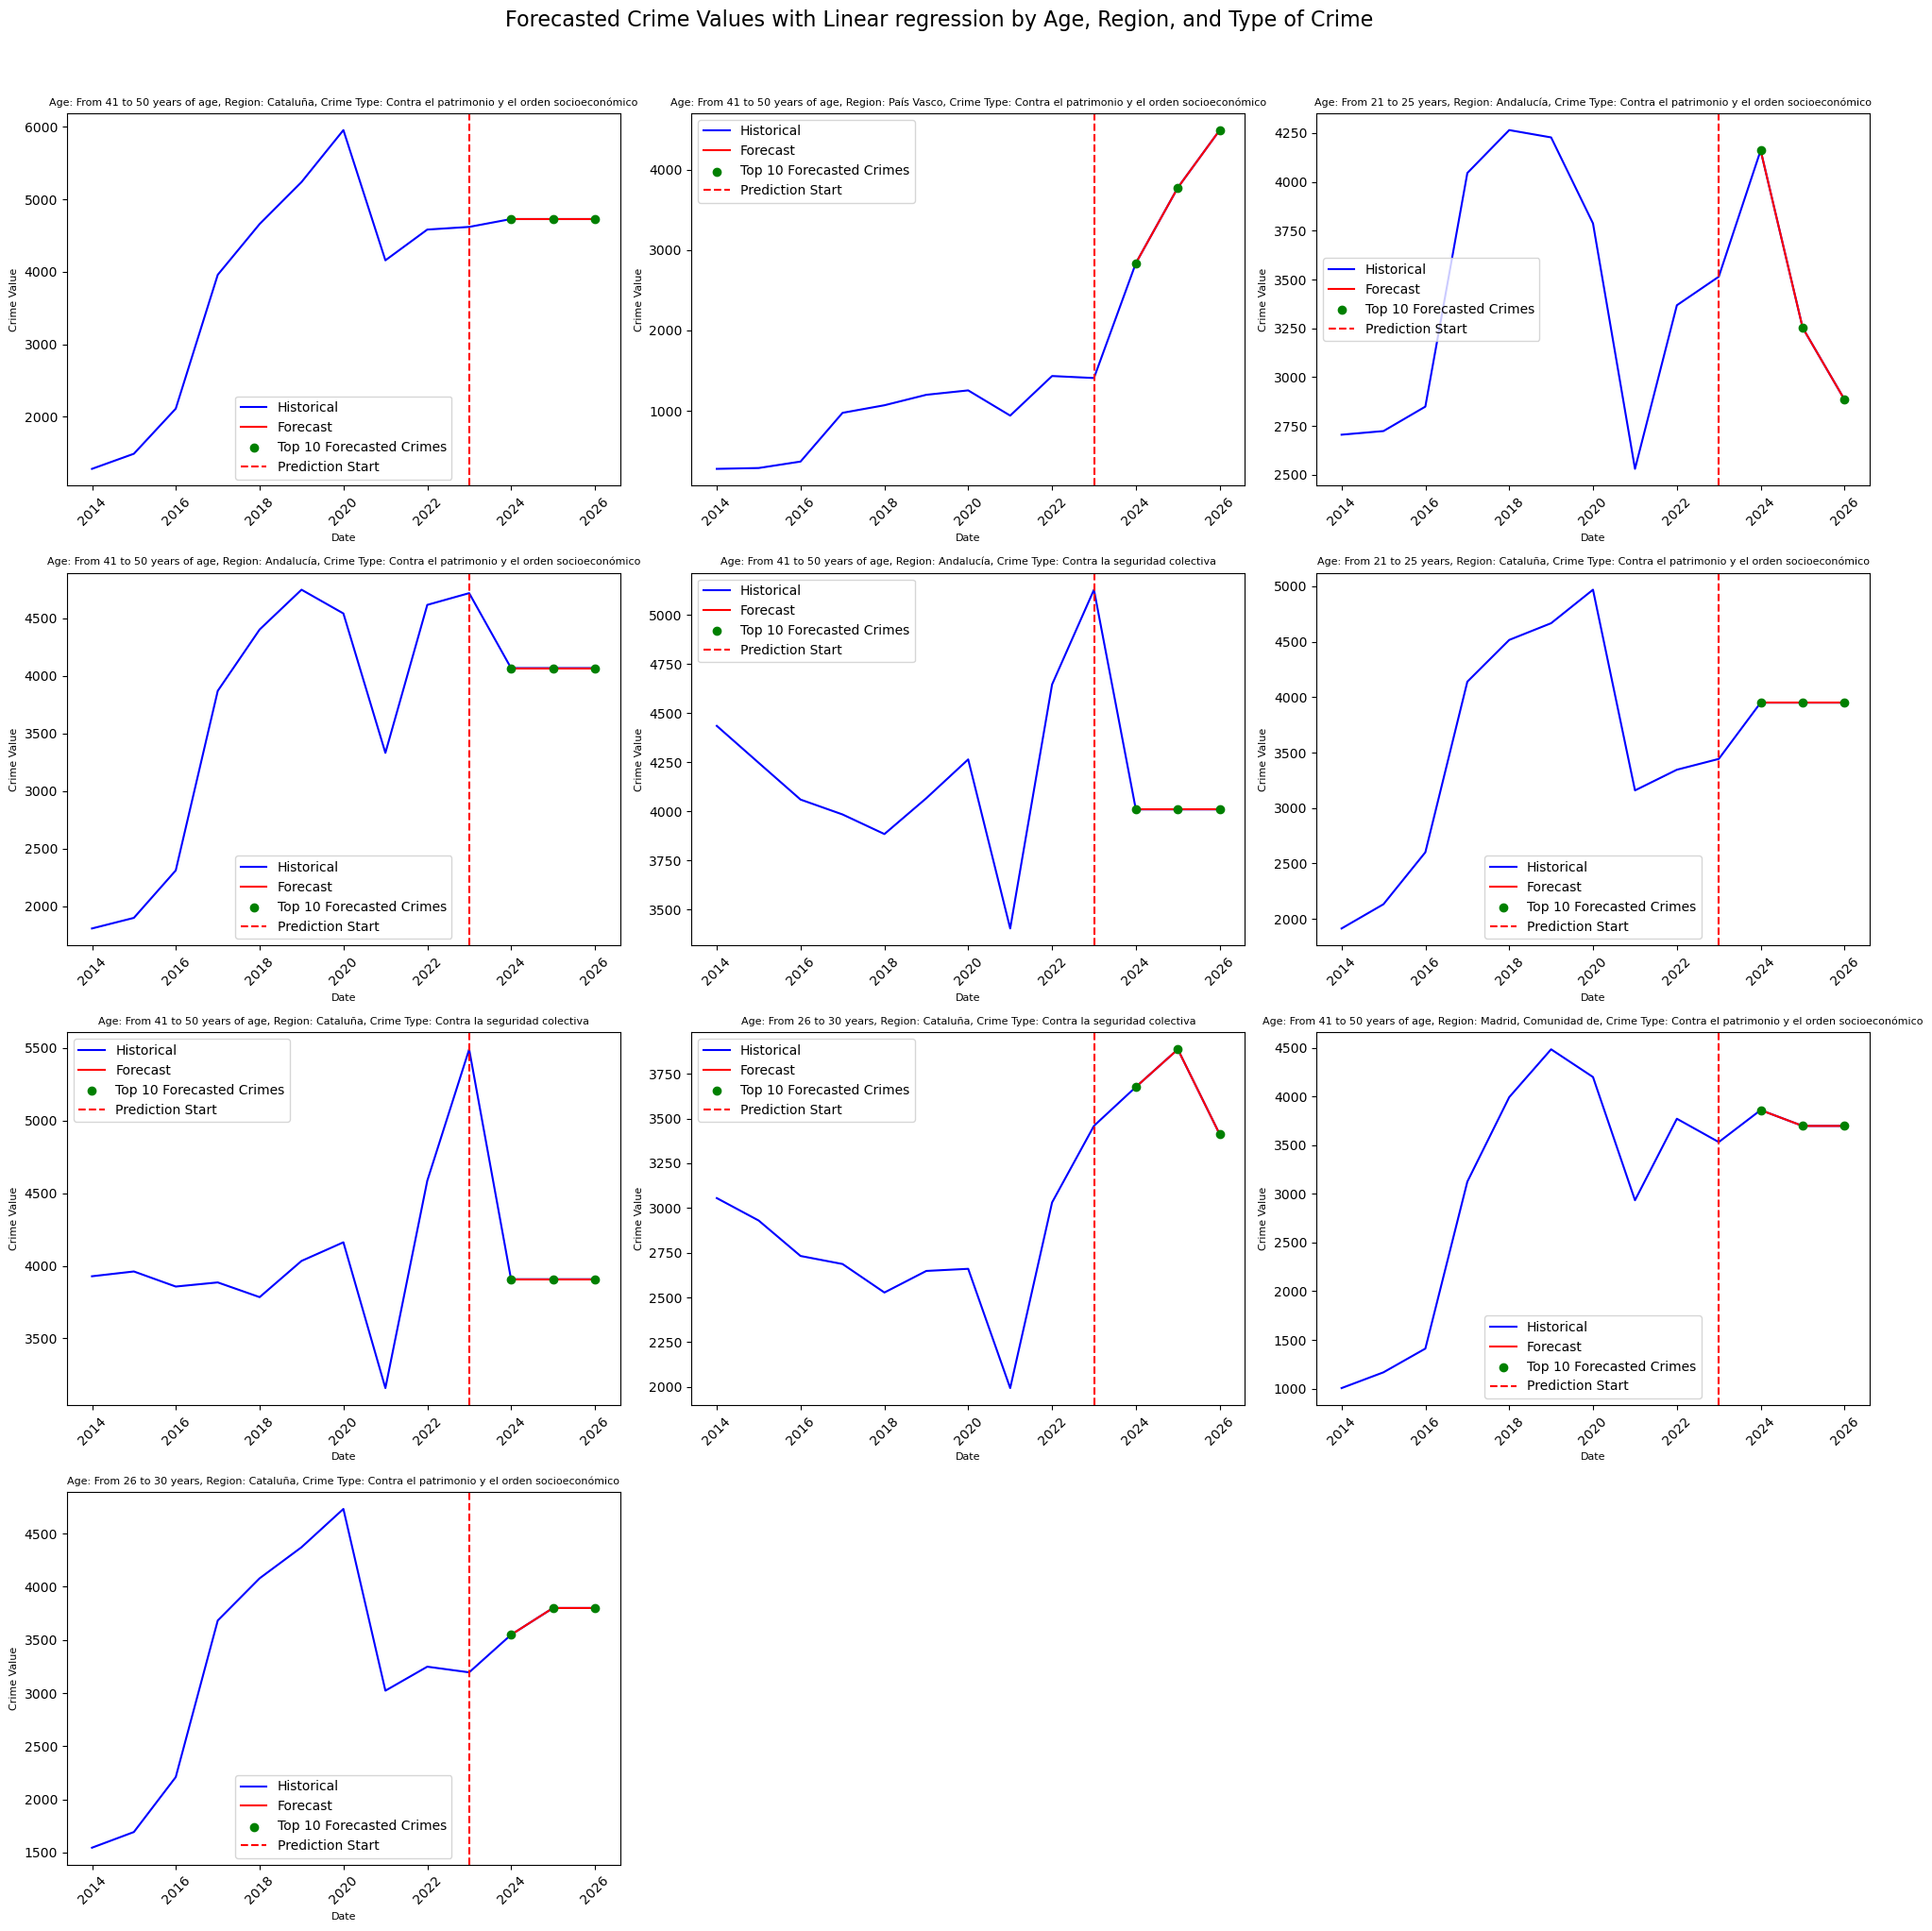

In [49]:
# Calculate grid dimensions
num_combinations = len(top_10_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Forecasted Crime Values with Linear regression by Age, Region, and Type of Crime', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_10_combinations):
    age, region, type_of_crime = combination
    df_current = final_pred_df_linreg[
        (final_pred_df_linreg['age'] == age) & 
        (final_pred_df_linreg['Region'] == region) & 
        (final_pred_df_linreg['Type_of_Crime'] == type_of_crime)]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current
    forecasted_data = df_current[df_current['ds'] > latest_date]
    

    axs[i].plot(historical_data['ds'], historical_data['y'], label='Historical', color='blue')
    axs[i].plot(forecasted_data['ds'], forecasted_data['y'], label='Forecast', color='red')

    # Highlight top 10 forecasted values in this segment
    top_forecasted = forecasted_data.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Top 10 Forecasted Crimes')

    axs[i].set_title(f"Age: {age}, Region: {region}, Crime Type: {type_of_crime}", fontsize=8)
    axs[i].set_xlabel('Date', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Prediction Start')
    axs[i].set_ylabel('Crime Value', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Turn off axes for any remaining subplots
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [50]:
#Now lets see Sepearate ARIMA model for each region, crime type and age category

In [51]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df_seperate_arima = df_filtered_summ[df_filtered_summ['region_encoded'] == input_region_encoded]

# Preparing the data structure to hold models
models = {}


for crime_type in df_seperate_arima['type_of_crime_encoded'].unique():
    models[crime_type] = {}
    for age_group in df_seperate_arima['age_encoded'].unique():
        models[crime_type][age_group] = {}
        for region in df_seperate_arima['region_encoded'].unique():
            # Filter the dataset for each combination of 'Type of Crime', 'Age', and 'Region'
            df_filt = df_seperate_arima[(df_seperate_arima['type_of_crime_encoded'] == crime_type) & 
                                        (df_seperate_arima['age_encoded'] == age_group) & 
                                        (df_seperate_arima['region_encoded'] == region)]
            
            # Check if there's enough data
            if len(df_filt) > 3:  # Adjust this threshold as needed
                df_filt.index = df_filt['ds']
                df_filt.index.freq = 'Y'
                ts = df_filt['y']
                
                # Try fitting the ARIMA model
                try:
                    model = ARIMA(ts, order=(1, 1, 1))  # Adjust order based on your data
                    fitted_model = model.fit()
                    
                    # Store the fitted model
                    models[crime_type][age_group][region] = fitted_model
                except Exception as e:
                    print(f"Model fitting failed for Type of Crime: {crime_type}, Age: {age_group}, Region: {region} with error: {e}")
            else:
                print(f"Not enough data for Type of Crime: {crime_type}, Age: {age_group}, Region: {region}")


d:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

In [52]:
combined_df = pd.concat([historical_data, forecast_df], ignore_index=True)


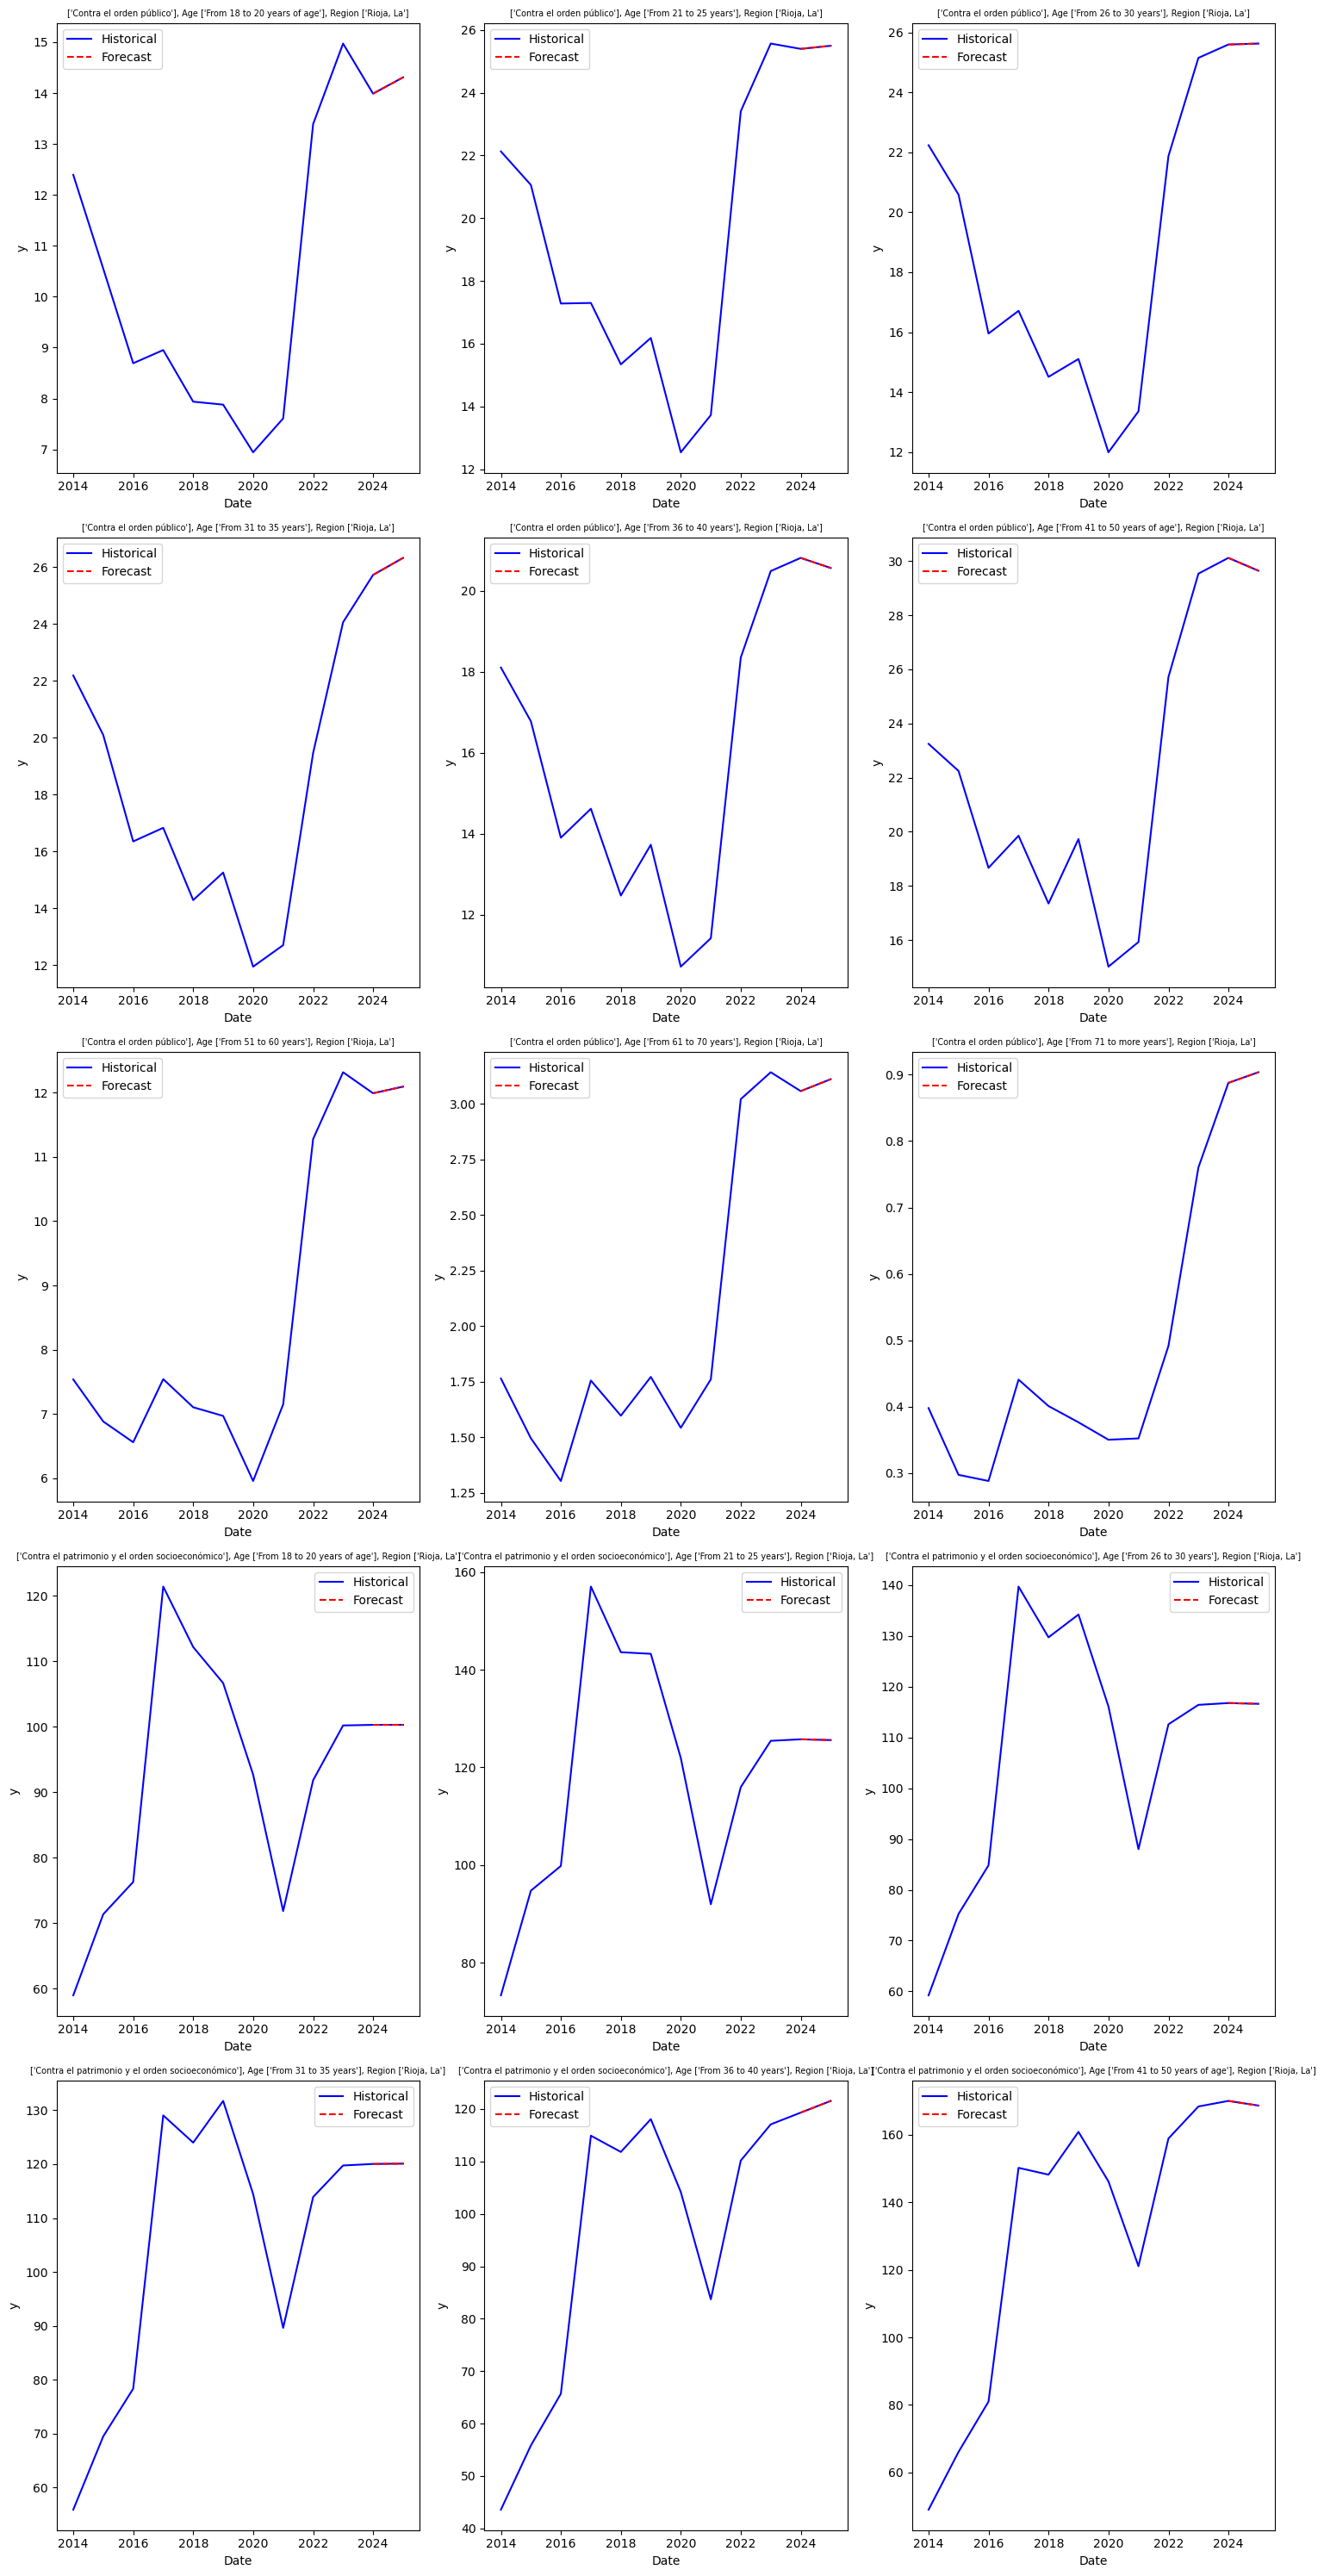

In [53]:

import numpy as np
from datetime import datetime, timedelta

forecast_end = pd.to_datetime('2024-12-31')


combined_data = {}

for crime_type in models:
    combined_data[crime_type] = {}
    for age_group in models[crime_type]:
        combined_data[crime_type][age_group] = {}
        for region in models[crime_type][age_group]:
            # Select the relevant historical data
            historical_data = df_seperate_arima[
                (df_seperate_arima['type_of_crime_encoded'] == crime_type) & 
                (df_seperate_arima['age_encoded'] == age_group) &
                (df_seperate_arima['region_encoded'] == region)
            ]
            
            # Forecast
            last_date = historical_data['ds'].max()
            steps = (forecast_end.year - last_date.year) 
            forecast = models[crime_type][age_group][region].forecast(steps=steps)
            
            forecast_dates = pd.date_range(start=last_date +  timedelta(days=365), periods=len(forecast), freq='A')
            forecast_df = pd.DataFrame({
                'ds': forecast_dates, 
                'y': forecast, 
                'type_of_crime_encoded': crime_type, 
                'age_encoded': age_group,
                'region_encoded': region
            })
            
            # Combine historical and forecast data
            combined_df = pd.concat([historical_data, forecast_df], ignore_index=True)
            combined_data[crime_type][age_group][region] = combined_df

plot_limit = 15
plot_count = 0

# Determine the layout of subplots
nrows = 5 
ncols = 3  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))  # Adjust the figsize as needed
fig.tight_layout(pad=6.0)

for crime_type in combined_data:
    if plot_count >= plot_limit: break
    for age_group in combined_data[crime_type]:
        if plot_count >= plot_limit: break
        for region in combined_data[crime_type][age_group]:
            if plot_count >= plot_limit: break
            
            ax = axes[plot_count // ncols, plot_count % ncols]
            combined_df = combined_data[crime_type][age_group][region]
            
            # Plot historical data
            ax.plot(combined_df['ds'], combined_df['y'], label='Historical', color='blue')
            
            forecast_df = combined_df[combined_df['ds'] > last_date]
            ax.plot(forecast_df['ds'], forecast_df['y'], label='Forecast', color='red', linestyle='--')
            ax.set_title(f"{loaded_type_of_crime_encoder.inverse_transform([crime_type])}, Age {loaded_age_encoder.inverse_transform([age_group])}, Region {loaded_region_encoder.inverse_transform([region])}",fontsize=7)
            ax.set_xlabel('Date')
            ax.set_ylabel('y')
            ax.legend(loc='best')
            
            plot_count += 1

# Adjust unused subplots
for i in range(plot_count, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [54]:
#dont execute this is only for previous crimes loading and not used
import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    current_region_type = None
    current_age_type = None
    encountered_region_type = False 
    encountered_sex_type = False

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a crime type. 

        if  cell_a_value != None:
            if not cell_a_value[:1].isspace() :
                current_region_type = cell_a_value
                encountered_region_type = True  

                continue 
            
        if cell_a_value != None:
            if  cell_a_value[:4].isspace() and not cell_a_value[:5].isspace():
                current_sex_type = cell_a_value
                encountered_sex_type = True 

                continue 
            
        # After a crime type, the next rows are sex  until the next crime type.
        if cell_a_value != None:
            if not cell_a_value[:9].isspace():
                previouscrime = cell_a_value  

                for col in range(2, sheet.max_column + 1): 
                    year = sheet.cell(row=7, column=col).value 
                    value = sheet.cell(row=row, column=col).value
                    if value != None:
                        data.append([current_region_type,current_sex_type, previouscrime, year, value])
                continue
        


    df = pd.DataFrame(data, columns=['Region', 'sex','previouscrime' ,'Year', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'C:\Users\mahes\Downloads\numberofpreviouscrimes.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df = df[df['Region'] != 'National Total']
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['sex'] = df['sex'].str.strip()
df['previouscrime'] = df['previouscrime'].str.strip()

df = df[df['sex'] != 'Total']
df = df[df['previouscrime'] != 'Total']

df_prevcrime = df
